# Порівняльний аналіз алгоритмів сортування: злиттям, вставками та Timsort

В `Python` існують дві вбудовані функції сортування: `sorted` і `list.sort`, які реалізують алгоритм `Timsort`. `Timsort` — це гібридний алгоритм, що поєднує сортування злиттям і сортування вставками для досягнення високої ефективності на різних наборах даних.

Метою цього дослідження є порівняння трьох алгоритмів сортування: сортування вставками, сортування злиттям та `Timsort`, за часом виконання на різних типах даних:
- Випадкові дані
- Відсортовані дані
- Зворотно відсортовані дані

## Опис алгоритмів
### Сортування вставками
Сортування вставками будує відсортований список по одному елементу за раз, вставляючи кожен новий елемент у відповідне місце.
- Часова складність:
  - Найгірший випадок: $O(n^2)$
  - Найкращий випадок: $O(n)$
### Сортування злиттям
Сортування злиттям використовує підхід "розділяй і володарюй", рекурсивно розділяючи масив на підмасиви і з'єднуючи їх в відсортований масив.
- Часова складність:
  - Найгірший випадок: $O(n \log n)$
  - Найкращий випадок: $O(n \log n)$
### Timsort
Timsort поєднує сортування вставками та сортування злиттям, оптимізуючи сортування для реальних даних, які часто містять уже відсортовані послідовності.
- Часова складність:
  - Найгірший випадок: $O(n  \log  n)$
  - Найкращий випадок: $O(n)$

## Методика тестування
1. Генерація наборів даних:
    - Випадкові масиви цілих чисел різних розмірів (від 1,000 до 100,000 елементів).
    - Відсортовані та зворотно відсортовані масиви для перевірки найкращого та найгіршого випадків.
2. Вимірювання часу виконання:
    - Використовуємо модуль timeit для точного вимірювання часу.
    - Кожен тест виконується кілька разів для отримання середнього значення.
3. Візуалізація результатів:
    - Будуємо графіки з використанням бібліотеки `matplotlib`.

## Реалізація алгоритмів

In [1]:
# Встановити модулі
# %pip install matplotlib
# %pip install tabulate
# %pip install timeit

In [2]:
import random
import timeit
import matplotlib.pyplot as plt

### Сортування вставками

In [3]:
def insertion_sort(data) -> None:
    """Сортування вставками"""
    for i in range(1, len(data)):
        key = data[i]
        j = i - 1
        while j >= 0 and data[j] > key:
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = key

### Сортування злиттям

In [4]:
def merge_sort(data) -> None:
    """Сортування злиттям"""
    if len(data) > 1:
        mid = len(data) // 2
        L = data[:mid]
        R = data[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        # Злиття двох половин
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                data[k] = L[i]
                i += 1
            else:
                data[k] = R[j]
                j += 1
            k += 1

        # Перевірка, чи залишилися елементи
        while i < len(L):
            data[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            data[k] = R[j]
            j += 1
            k += 1

### Сортування TimSort

In [5]:
def timsort(data) -> None:
    """Сортування TimSort (вбудоване)"""
    return sorted(data)

## Функції для тестування

Генеруємо масиви з випадковими числами

In [6]:
def generate_random_list(size) -> list:
    """Генерація списку для сортування"""
    return [random.randint(0, size) for _ in range(size)]

def generate_sorted_list(size)-> list:
    """ Генерація відсортованого списку """
    return list(range(1, size + 1))

def generate_reverse_sorted_list(size)-> list:
    """ Генерація відсортованого списку у зворотньому порядку """
    return list(range(size, 0, -1))

Вимірювання часу виконання

In [7]:
def measure_time(sort_func, data) -> float:
    """Вимірювання часу сортування"""
    setup_code = f"from __main__ import {sort_func.__name__}"
    stmt = f"{sort_func.__name__}({data})"
    times = timeit.repeat(stmt=stmt, setup=setup_code, repeat=3, number=1)
    return min(times)

## Проведення експериментів

### Встановлення розмірів масивів та ініціалізація списків для тестування

In [8]:
data_types = ["Випадкові", "Відсортовані", "Зворотно відсортовані"]
sizes = [1000, 5000, 10000, 20000, 50000, 100000]

sorting_algorithms = {
    "Сортування вставками": insertion_sort,
    "Сортування злиттям": merge_sort,
    "Timsort": timsort,
}

results = {
    "Випадкові": {alg: [] for alg in sorting_algorithms},
    "Відсортовані": {alg: [] for alg in sorting_algorithms},
    "Зворотно відсортовані": {alg: [] for alg in sorting_algorithms},
}

### Тестування алгоритмів

In [9]:
for size in sizes:
    # Генерація наборів даних
    random_data = generate_random_list(size)
    sorted_data = generate_sorted_list(size)
    reverse_sorted_data = generate_reverse_sorted_list(size)

    datasets = {
        "Випадкові": random_data,
        "Відсортовані": sorted_data,
        "Зворотно відсортовані": reverse_sorted_data,
    }

    for data_type, data in datasets.items():
        for alg_name, alg_func in sorting_algorithms.items():
            # Для сортування вставками обмежимо розмір масиву до 20,000
            if alg_name == "Сортування вставками" and size > 20000:
                results[data_type][alg_name].append(None)
                continue
            time_taken = measure_time(alg_func, data)
            results[data_type][alg_name].append(time_taken)
            print(
                f"Розмір: {size}, Дані: {data_type}, Алгоритм: {alg_name}, Час: {time_taken}"
            )

Розмір: 1000, Дані: Випадкові, Алгоритм: Сортування вставками, Час: 0.021116798001457937
Розмір: 1000, Дані: Випадкові, Алгоритм: Сортування злиттям, Час: 0.0016429070092272013
Розмір: 1000, Дані: Випадкові, Алгоритм: Timsort, Час: 6.61999947624281e-05
Розмір: 1000, Дані: Відсортовані, Алгоритм: Сортування вставками, Час: 0.00010010000551119447
Розмір: 1000, Дані: Відсортовані, Алгоритм: Сортування злиттям, Час: 0.0013746070035267621
Розмір: 1000, Дані: Відсортовані, Алгоритм: Timsort, Час: 6.700007361359894e-06
Розмір: 1000, Дані: Зворотно відсортовані, Алгоритм: Сортування вставками, Час: 0.04158699300023727
Розмір: 1000, Дані: Зворотно відсортовані, Алгоритм: Сортування злиттям, Час: 0.0018213080038549379
Розмір: 1000, Дані: Зворотно відсортовані, Алгоритм: Timsort, Час: 5.900001269765198e-06
Розмір: 5000, Дані: Випадкові, Алгоритм: Сортування вставками, Час: 0.558734973994433
Розмір: 5000, Дані: Випадкові, Алгоритм: Сортування злиттям, Час: 0.010437399992952123
Розмір: 5000, Дані: 

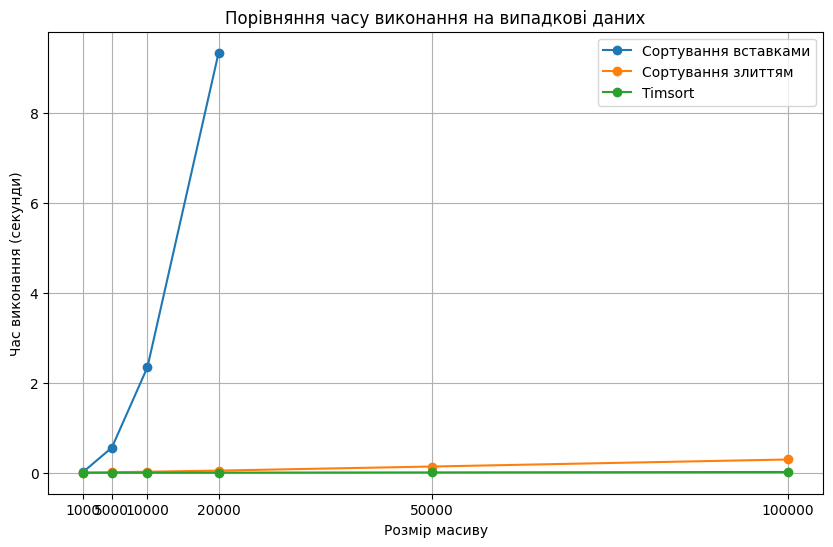

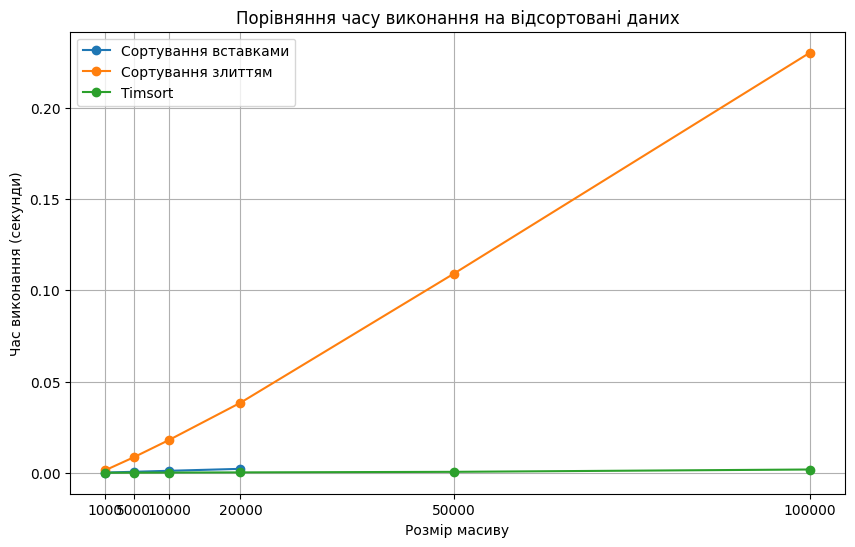

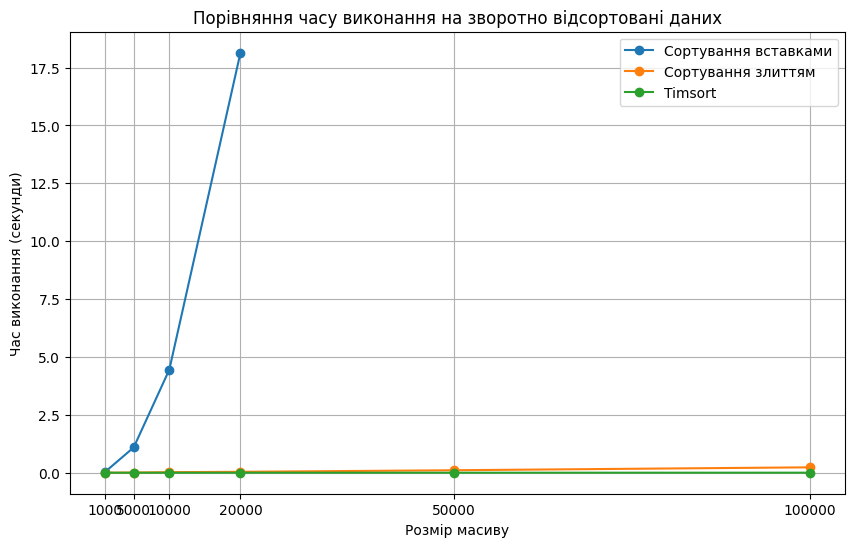

In [10]:
for data_type in data_types:
    plt.figure(figsize=(10, 6))
    for alg_name in sorting_algorithms:
        times = results[data_type][alg_name]
        # Фільтруємо None значення
        filtered_sizes = [size for i, size in enumerate(sizes) if times[i] is not None]
        filtered_times = [t for t in times if t is not None]
        plt.plot(filtered_sizes, filtered_times, marker="o", label=alg_name)
    plt.title(f"Порівняння часу виконання на {data_type.lower()} даних")
    plt.xlabel("Розмір масиву")
    plt.ylabel("Час виконання (секунди)")
    plt.legend()
    plt.grid(True)
    plt.xticks(sizes)
    plt.savefig(f"{data_type}_data_plot.png")
    plt.show()

## Висновки
Проведений порівняльний аналіз трьох алгоритмів сортування (сортування вставками, сортування злиттям та Timsort) на різних наборах даних (випадкові, відсортовані та зворотно відсортовані) дозволяє зробити наступні висновки:
- Сортування вставками є ефективним для малих та вже відсортованих масивів завдяки часовій складності $O(n)$ у найкращому випадку. Проте для великих та зворотно відсортованих масивів його продуктивність значно погіршується до $O(n^2)$, що робить його непридатним для таких задач.
- Сортування злиттям має стабільну продуктивність з часовою складністю $O(n \log n)$, яка не залежить від початкового стану даних. Це робить його хорошим вибором для сортування великих масивів з випадковим впорядкуванням.
- Timsort поєднує переваги сортування вставками та сортування злиттям, що дозволяє йому досягати високої ефективності на реальних даних, які часто містять частково відсортовані послідовності. Він демонструє найкращу продуктивність на відсортованих та випадкових даних, і лише трохи поступається сортуванню злиттям на зворотно відсортованих масивах.

Таким чином, використання вбудованого алгоритму Timsort в Python є найкращим вибором для більшості задач сортування, що підтверджується як теоретичними оцінками, так і емпіричними результатами.